# KL Divergence Visualization

See how KL changes over two different days, one calibration, one attack
- calibration: 2016-04-08
- attack: 2016-08-08

In [32]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

hist_cols = ['sa', 'da', 'sp', 'dp']
kl_cali = pd.read_csv('../processed_data/2016-04-08_100.kl.csv', index_col=0)
kl_attack = pd.read_csv('../processed_data/2016-08-08_100.kl.csv', index_col=0)

kl_cali.index = pd.to_datetime(kl_cali.index)
kl_attack.index = pd.to_datetime(kl_attack.index)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
def agg_by_feature(df):
    for col in hist_cols:
        df[col] = sum([df["%s_%s" % (col, idx)] for idx in range(5)]) / 5
    return df[hist_cols]

kl_cali_agg = agg_by_feature(kl_cali)
kl_attack_agg = agg_by_feature(kl_attack)

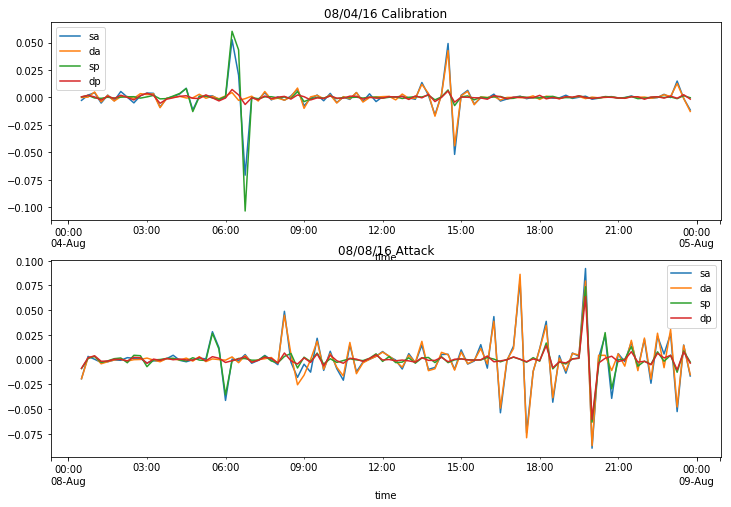

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
kl_cali_agg.diff().plot(ax=axes[0], title='08/04/16 Calibration')
kl_attack_agg.diff().plot(ax=axes[1], title='08/08/16 Attack')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115769e48>,
      dtype=object)

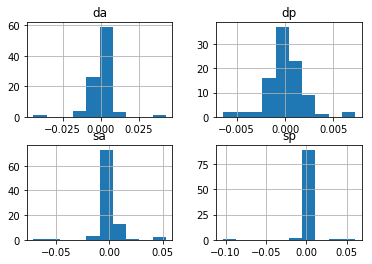

In [41]:
agg_by_feature(kl_cali).diff().hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115b44320>,
      dtype=object)

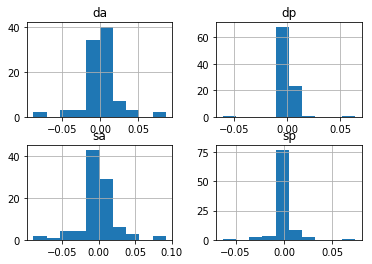

In [42]:
agg_by_feature(kl_attack).diff().hist()